In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the objective function
def objective_function(x):
    x1, x2 = x
    return x1**2 + 4 * x1 * x2 + 4 * x2**2

# Define the gradient of the function
def compute_gradient(x):
    x1, x2 = x
    grad_x1 = 2 * x1 + 4 * x2
    grad_x2 = 4 * x1 + 8 * x2
    return np.array([grad_x1, grad_x2])

# Define the scaling matrix
def scaling_matrix():
    return np.array([[1/2, 0], [0, 1/8]])

# Coordinate descent with scaling
def coordinate_descent_with_scaling(initial_point, tolerance, step_decay, max_iters=100000):
    x = np.array(initial_point, dtype=float)
    gradient = compute_gradient(x)
    scaling_mat = scaling_matrix()
    grad_norm = np.linalg.norm(gradient)
    iterations = 0
    min_step_size = 1e-15  # Lower bound for step size

    while grad_norm > tolerance and iterations < max_iters:
        descent_direction = -scaling_mat @ gradient
        step_size = 1
        gamma = 0.5

        # Line search
        while step_size > min_step_size and objective_function(x + step_size * descent_direction) > (
            objective_function(x) + gamma * step_size * np.dot(gradient, descent_direction)
        ):
            step_size *= step_decay

        if step_size < min_step_size:
            print("Step size too small, stopping early.")
            break

        # Update a random coordinate
        coord = random.randint(0, 1)
        x[coord] += step_size * descent_direction[coord]

        # Update gradient, norm, and iteration count
        gradient = compute_gradient(x)
        grad_norm = np.linalg.norm(gradient)
        iterations += 1

    return iterations, x, objective_function(x)


Step size too small, stopping early.
For step_decay = 0.9:
Iterations = 32
Optimal Point = [-35.6001284   17.80006429]
Minimum Value = 0.0

Step size too small, stopping early.
For step_decay = 0.8:
Iterations = 38
Optimal Point = [-41.56828482  20.78414249]
Minimum Value = 0.0

For step_decay = 0.75:
Iterations = 100000
Optimal Point = [-36.34384134  18.17192069]
Minimum Value = -2.2737367544323206e-13

Step size too small, stopping early.
For step_decay = 0.6:
Iterations = 40
Optimal Point = [-52.58929946  26.29465044]
Minimum Value = 1.3642420526593924e-12

Step size too small, stopping early.
For step_decay = 0.5:
Iterations = 30
Optimal Point = [-68.48279677  34.24139877]
Minimum Value = 0.0

Step size too small, stopping early.
For step_decay = 0.4:
Iterations = 36
Optimal Point = [-58.62235683  29.31117884]
Minimum Value = 0.0

Step size too small, stopping early.
For step_decay = 0.25:
Iterations = 68
Optimal Point = [-37.09149634  18.54574834]
Minimum Value = 2.273736754432320

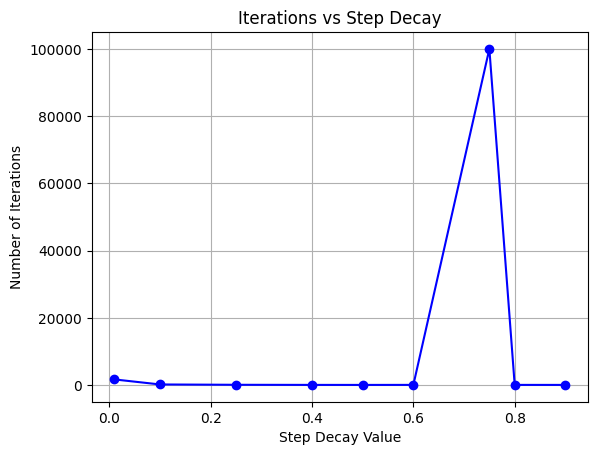

In [29]:

# Parameters
initial_point = [1, 40]
tolerance = 1e-12

# Step decay values
step_decay_values = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

# Initialize results for plotting
iterations_list = []
decay_list = []

# Run the algorithm for all step_decay values
for step_decay in step_decay_values:
    iterations, optimal_point, optimal_value = coordinate_descent_with_scaling(initial_point, tolerance, step_decay)
    
    print(f"For step_decay = {step_decay}:")
    print(f"Iterations = {iterations}")
    print(f"Optimal Point = {optimal_point}")
    print(f"Minimum Value = {optimal_value}")
    print()

    decay_list.append(step_decay)
    iterations_list.append(iterations)

# Plot iterations vs step_decay
plt.plot(decay_list, iterations_list, 'o-', color='blue')
plt.xlabel('Step Decay Value')
plt.ylabel('Number of Iterations')
plt.title('Iterations vs Step Decay')
plt.grid()
plt.show()